In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv('dummy.csv')
df.head()

,Location_ID,City,Province,Address,Latitude,Longitude,Avg_Income,Traffic_Daily,Competitors,Rent_Per_Year,AI_Score,Grade,Verdict
0,ID_10000,Bandung,Jawa Barat,"Jl. Sisingamangaraja No. 23, Bandung",-6.873023,107.642522,4567055,15523,93,84830294,45,D,Tidak Disarankan ❌
1,ID_10001,Malang,Jawa Timur,"Jl. Pattimura No. 102, Malang",-7.994168,112.647851,3988238,8494,30,32936573,73,B,Potensial ✅
2,ID_10002,Tangerang Selatan,Banten,"Jl. Jend. Sudirman No. 168, Tangerang Selatan",-6.275687,106.659604,4795291,18557,53,28642861,80,B,Potensial ✅
3,ID_10003,Bandung,Jawa Barat,"Jl. Sisingamangaraja No. 109, Bandung",-6.883174,107.521256,4298403,15897,81,64779815,62,C,Cukup (Perlu Strategi) ⚠️
4,ID_10004,Padang,Sumatera Barat,"Jl. Cikini Raya No. 83, Padang",-1.012486,100.435793,2800000,14548,6,51553106,68,C,Cukup (Perlu Strategi) ⚠️


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location_ID    2000 non-null   object 
 1   City           2000 non-null   object 
 2   Province       2000 non-null   object 
 3   Address        2000 non-null   object 
 4   Latitude       2000 non-null   float64
 5   Longitude      2000 non-null   float64
 6   Avg_Income     2000 non-null   int64  
 7   Traffic_Daily  2000 non-null   int64  
 8   Competitors    2000 non-null   int64  
 9   Rent_Per_Year  2000 non-null   int64  
 10  AI_Score       2000 non-null   int64  
 11  Grade          2000 non-null   object 
 12  Verdict        2000 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 203.2+ KB


In [26]:
df.describe()

,Latitude,Longitude,Avg_Income,Traffic_Daily,Competitors,Rent_Per_Year,AI_Score
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,-4.551007,111.351972,5.451863e+06,14379.360500,58.645500,7.196613e+07,61.687500
std,3.618751,8.386395,1.695063e+06,4775.449154,22.845389,2.392050e+07,14.998277
min,-10.249482,98.566217,2.800000e+06,2000.000000,0.000000,1.500000e+07,13.000000
25%,-7.004636,106.728140,4.174334e+06,11189.250000,43.000000,5.546886e+07,51.000000
50%,-6.207980,110.269170,5.317198e+06,14357.000000,59.000000,7.160830e+07,62.000000
75%,-1.258808,115.234019,6.645470e+06,17542.750000,74.000000,8.865389e+07,72.000000
max,3.717969,140.728891,1.207744e+07,30463.000000,147.000000,1.374981e+08,99.000000


In [27]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Latitude', 'Longitude', 'Avg_Income', 'Traffic_Daily', 'Competitors',
       'Rent_Per_Year', 'AI_Score'],
      dtype='object')

In [28]:
cleaned_df = df.drop(axis=1, labels=['Location_ID'])
cleaned_df

,City,Province,Address,Latitude,Longitude,Avg_Income,Traffic_Daily,Competitors,Rent_Per_Year,AI_Score,Grade,Verdict
0,Bandung,Jawa Barat,"Jl. Sisingamangaraja No. 23, Bandung",-6.873023,107.642522,4567055,15523,93,84830294,45,D,Tidak Disarankan ❌
1,Malang,Jawa Timur,"Jl. Pattimura No. 102, Malang",-7.994168,112.647851,3988238,8494,30,32936573,73,B,Potensial ✅
2,Tangerang Selatan,Banten,"Jl. Jend. Sudirman No. 168, Tangerang Selatan",-6.275687,106.659604,4795291,18557,53,28642861,80,B,Potensial ✅
3,Bandung,Jawa Barat,"Jl. Sisingamangaraja No. 109, Bandung",-6.883174,107.521256,4298403,15897,81,64779815,62,C,Cukup (Perlu Strategi) ⚠️
4,Padang,Sumatera Barat,"Jl. Cikini Raya No. 83, Padang",-1.012486,100.435793,2800000,14548,6,51553106,68,C,Cukup (Perlu Strategi) ⚠️
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Tangerang Selatan,Banten,"Jl. Merdeka No. 194, Tangerang Selatan",-6.317631,106.743232,5555705,16813,35,91675428,70,B,Potensial ✅
1996,Yogyakarta,DI Yogyakarta,"Jl. Ahmad Yani No. 3, Yogyakarta",-7.774177,110.410034,3756245,9052,4,57933980,71,B,Potensial ✅
1997,Semarang,Jawa Tengah,"Jl. Gajah Mada No. 147, Semarang",-6.964905,110.401920,4348643,13408,53,66083454,57,C,Cukup (Perlu Strategi) ⚠️
1998,Jakarta Pusat,DKI Jakarta,"Jl. Sisingamangaraja No. 177, Jakarta Pusat",-6.154329,106.854987,7734573,15820,54,90021162,70,B,Potensial ✅


In [29]:
cat_cols = cleaned_df.select_dtypes(include=['object']).columns
cat_cols

Index(['City', 'Province', 'Address', 'Grade', 'Verdict'], dtype='object')

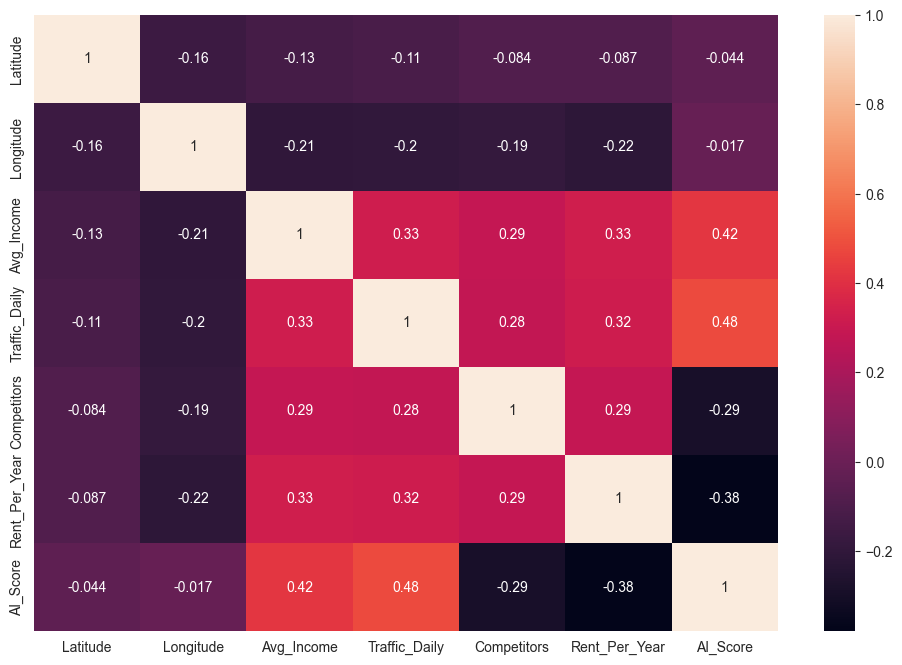

In [30]:
plt.figure(figsize=(12,8))

sns.heatmap(cleaned_df[num_cols].corr(), annot=True)
plt.show()

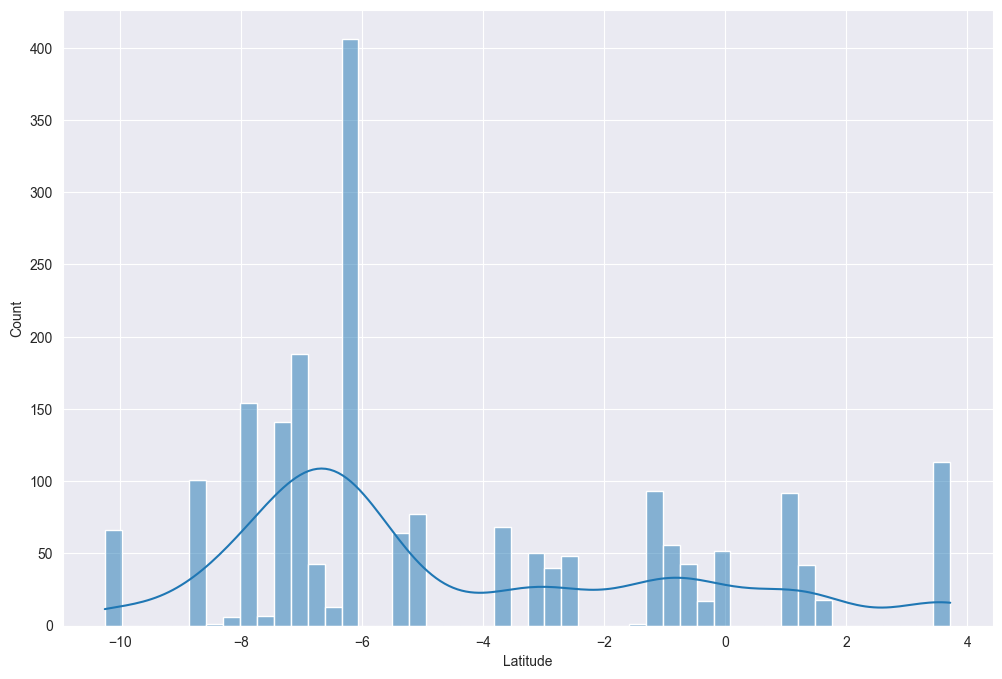

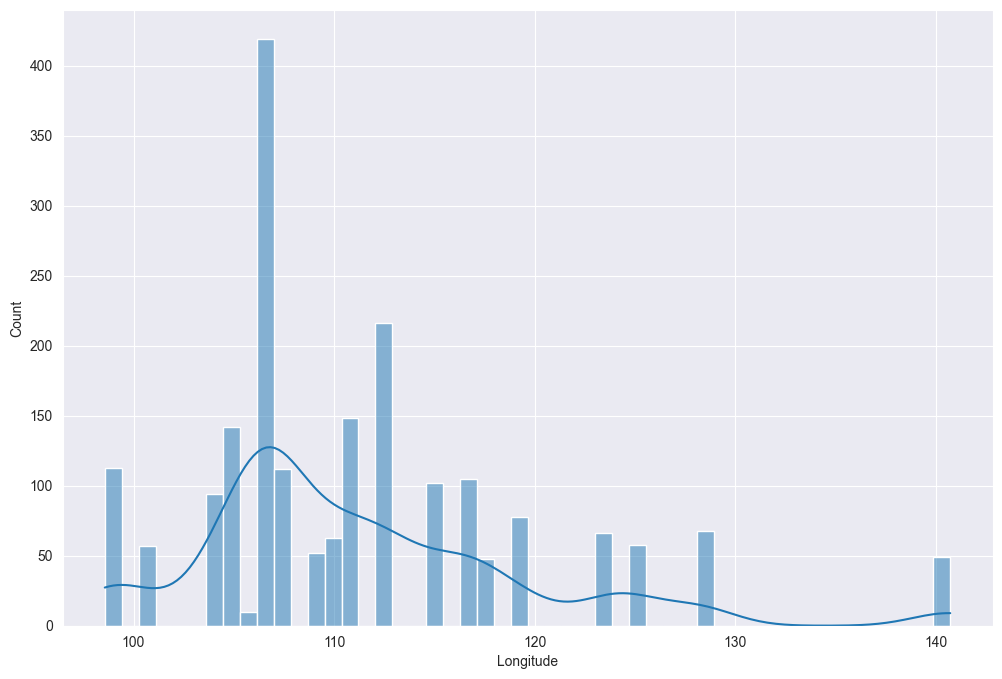

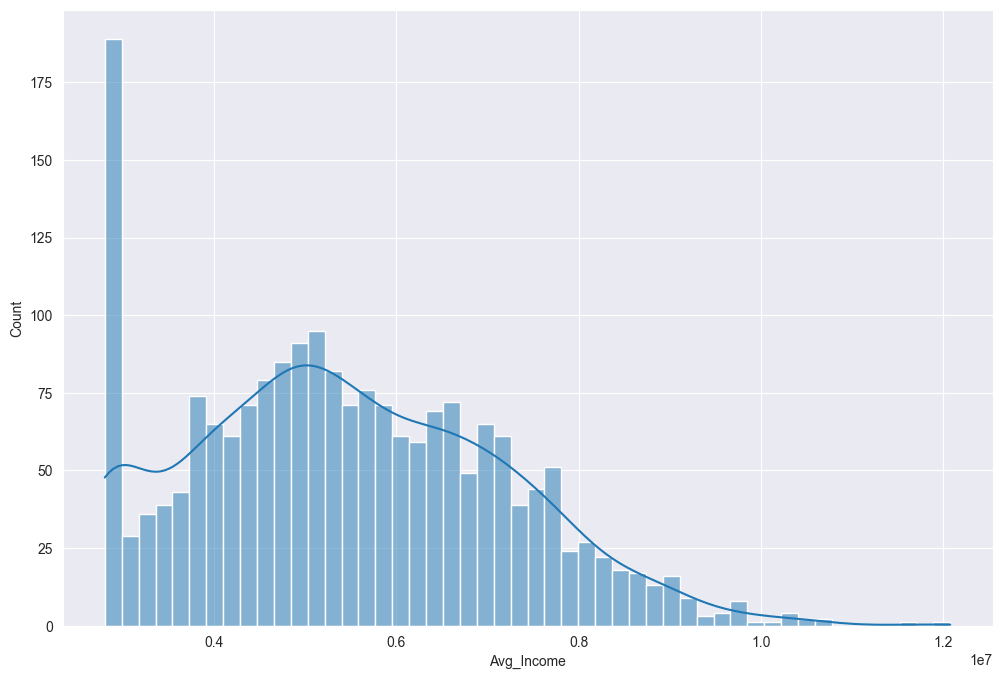

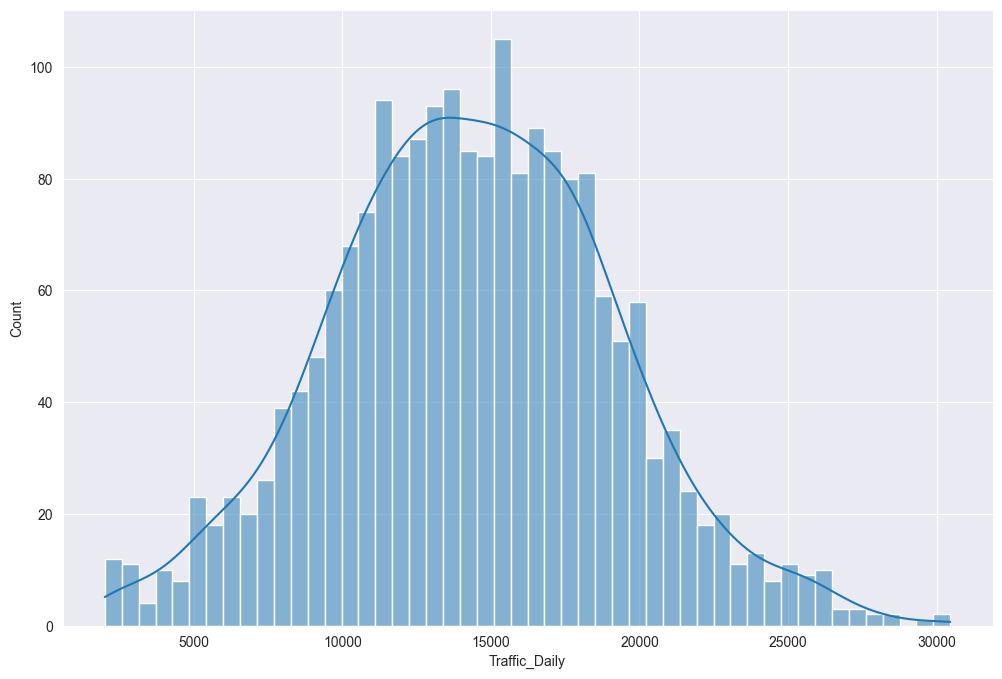

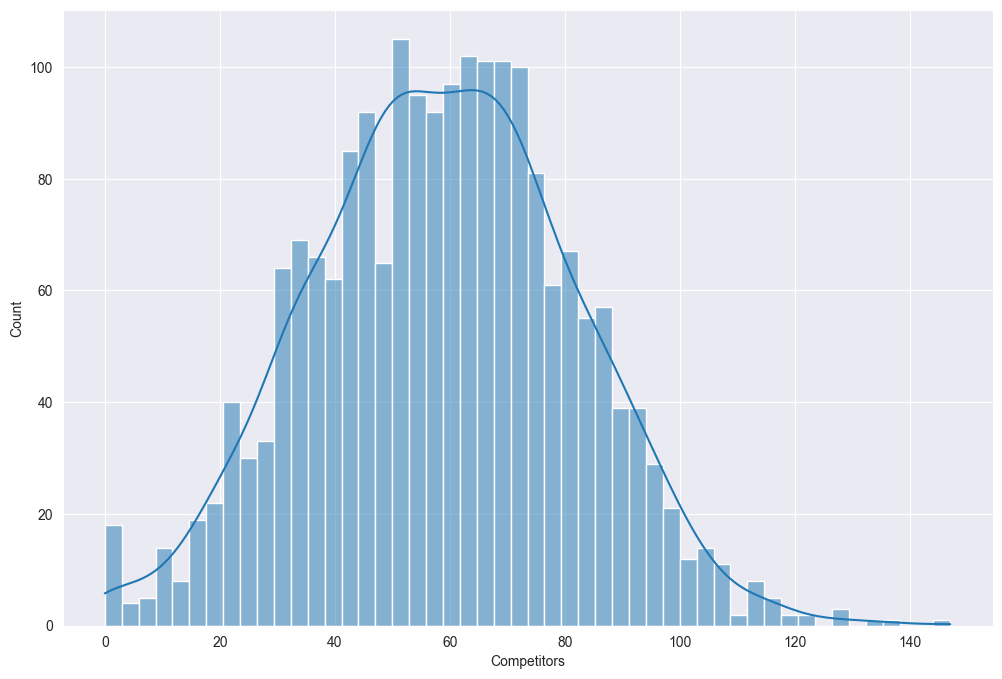

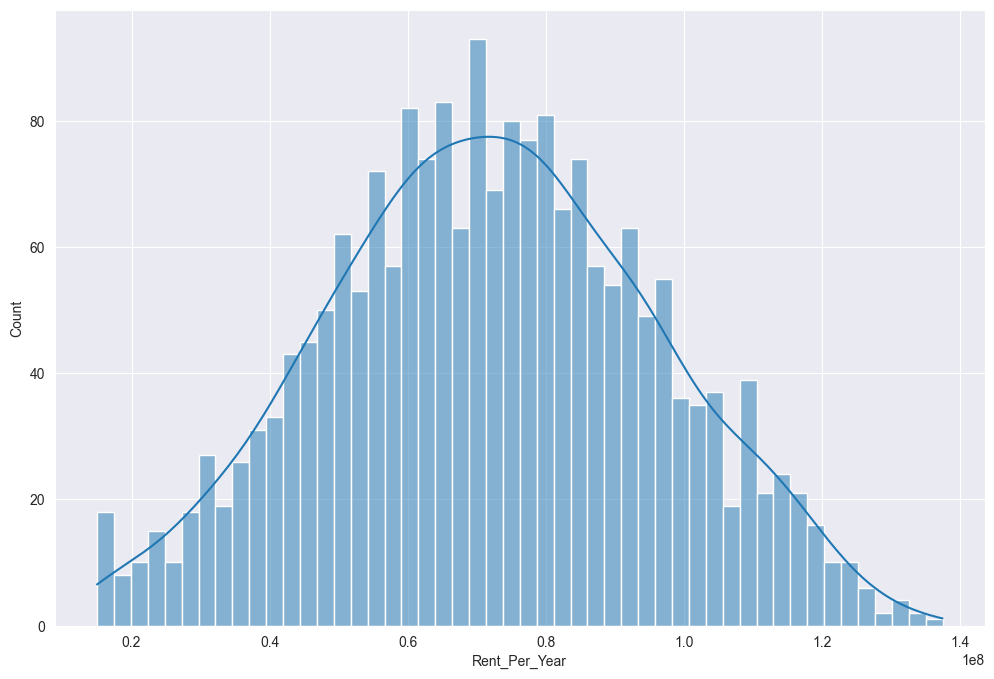

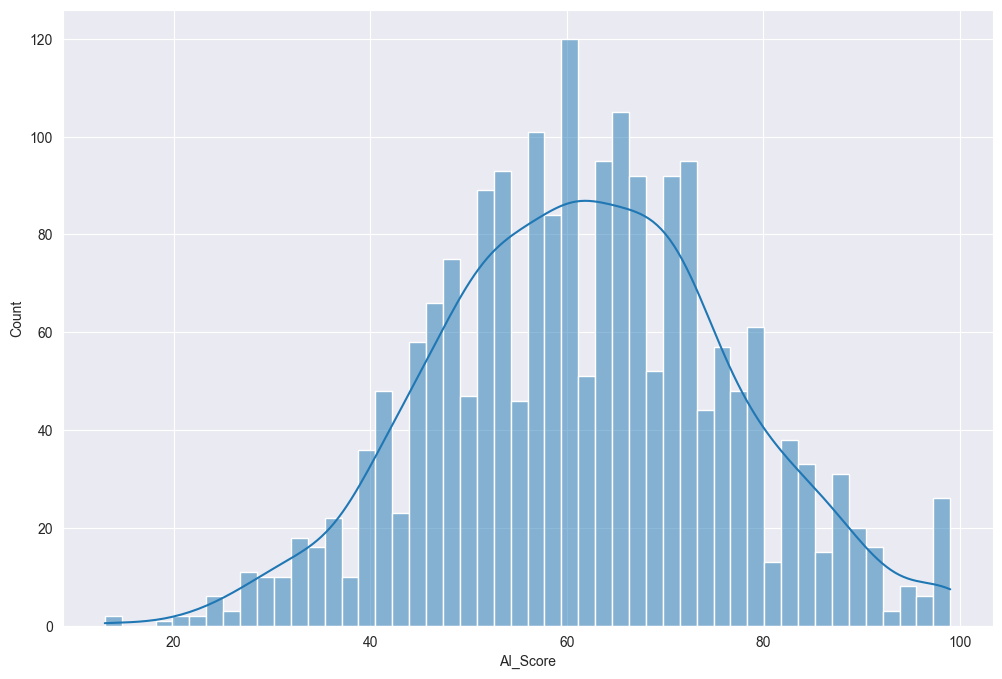

In [31]:
for col in num_cols :
    plt.figure(figsize=(12,8))
    sns.histplot(cleaned_df[col], bins=50, kde=True)
    plt.show()

In [32]:
cat_cols

Index(['City', 'Province', 'Address', 'Grade', 'Verdict'], dtype='object')

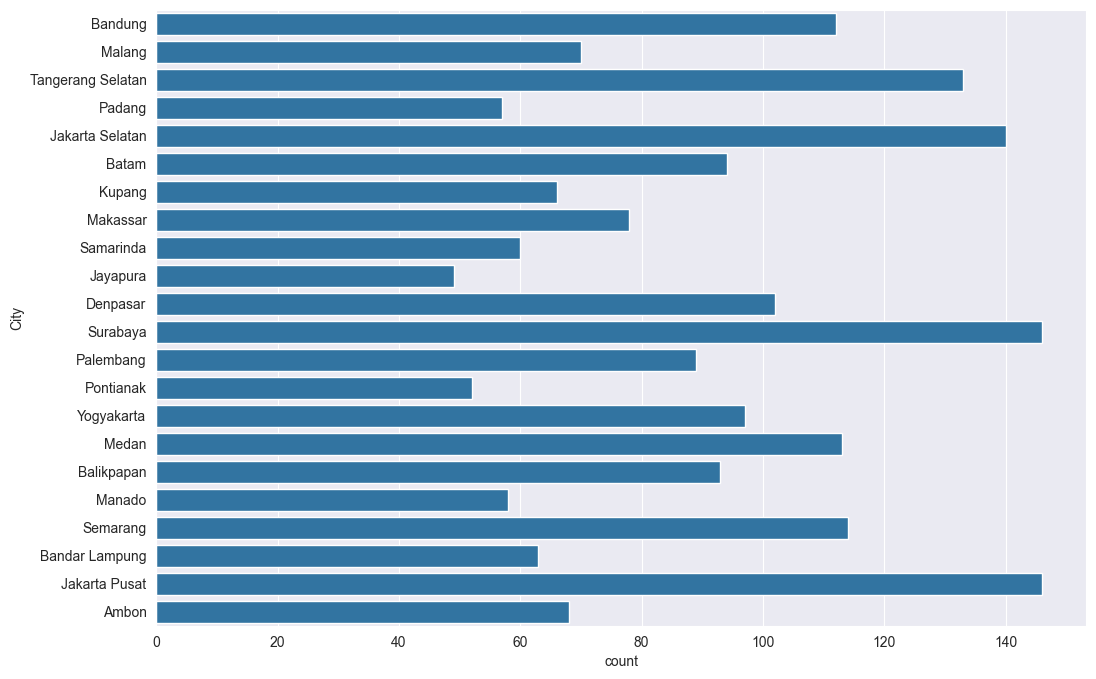

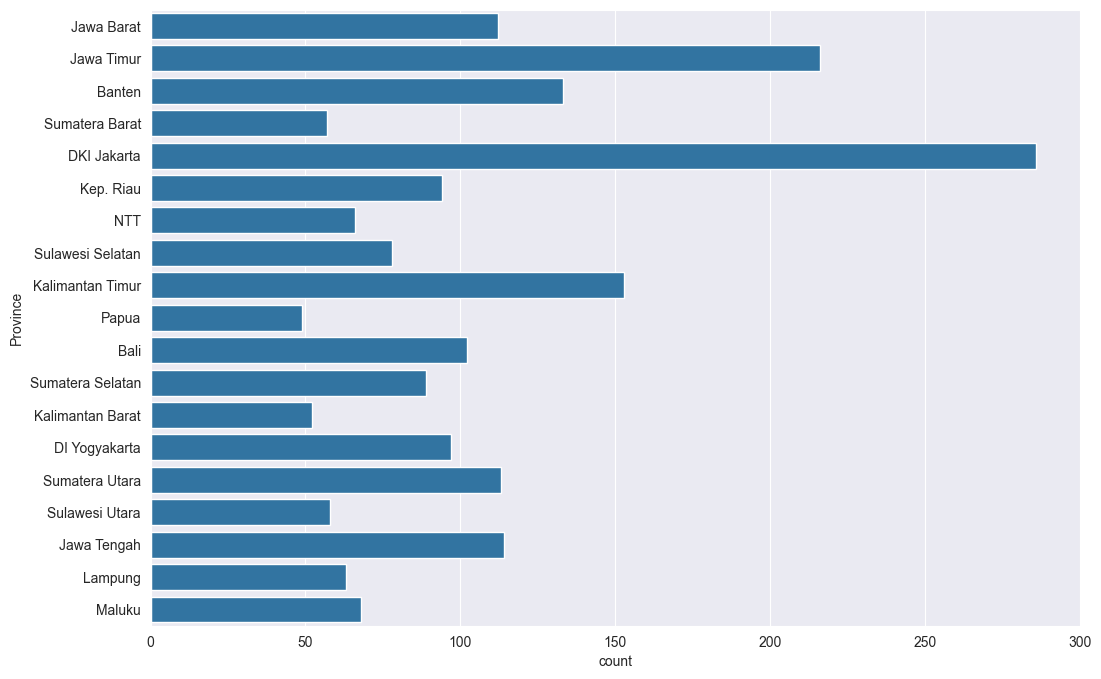

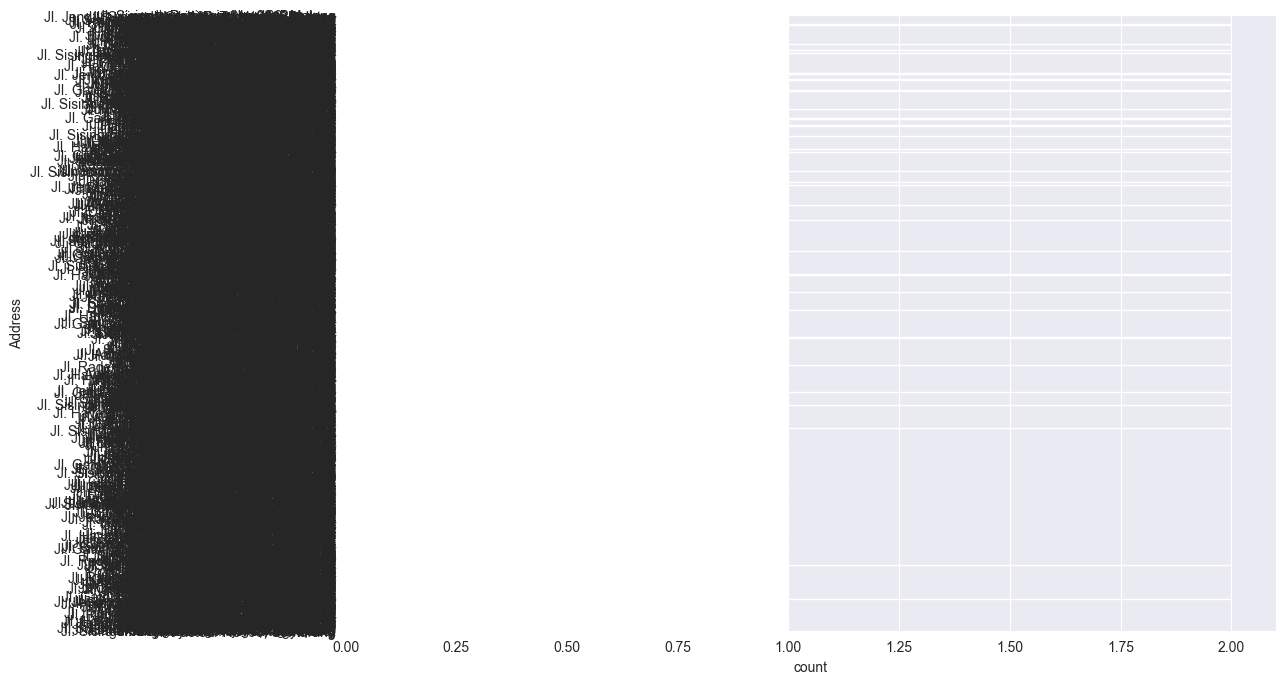

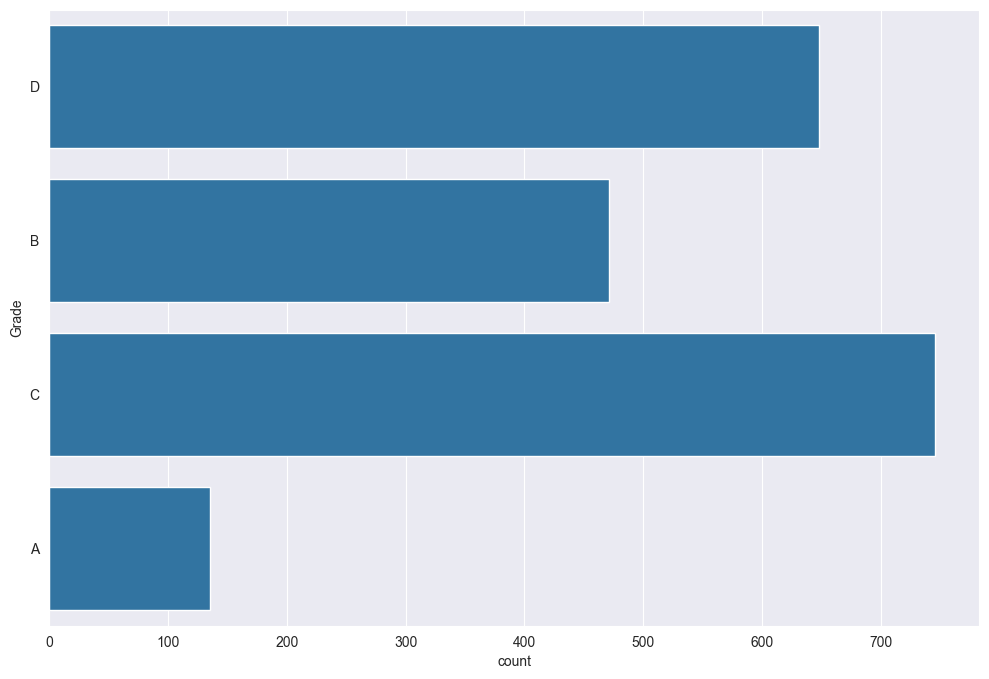

/Users/felixwilimz/Documents/Futurescale/prototypes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/felixwilimz/Documents/Futurescale/prototypes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/felixwilimz/Documents/Futurescale/prototypes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/felixwilimz/Documents/Futurescale/prototypes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/felixwilimz/Documents/Futurescale/prototypes/.venv

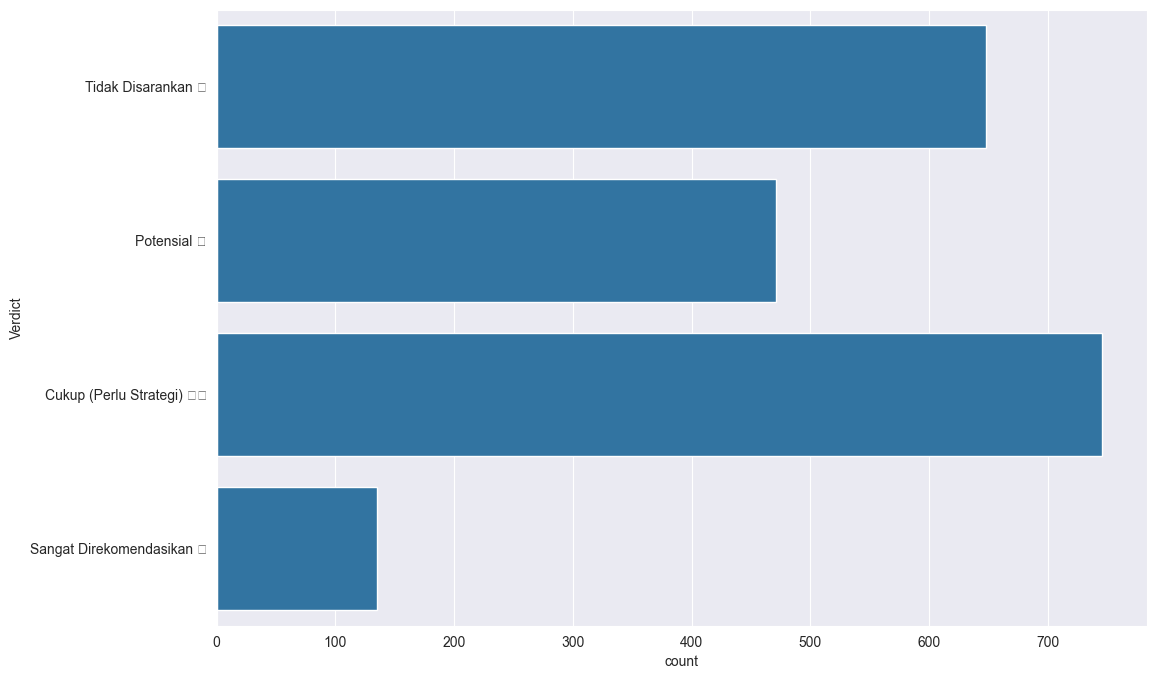

In [33]:
for col in cat_cols :
    plt.figure(figsize=(12,8))
    sns.countplot(cleaned_df[col])
    plt.show()